# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-03-04 09:37:17.378817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 09:37:17.421595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 09:37:17.434518: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 09:37:17.463111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-04 09:37:19.587840: W tensorflow/comp

In [2]:
grae_results = read_all_graeBuild_results()

#Sort out different grae results because their MSEs mean different things

- Alternate: MSE means how far off the alternate method (mainly matrix multiplication) is off from the actual data a or b when translated
- just_MSE: MSE measures how far GRAE methods are from the actual data when passed through like dataA to Z to dataB (and vice versa)
- All others: represent how far the GRAE method (Data a to Z) is off from the actual embedding points if there was no train / test split

In [3]:
#Sort out different grae results because their MSEs mean different things
MSE_to_Data = grae_results[grae_results['grae_build'] == "just_MSE"]
alternate = grae_results[grae_results['grae_build'] == "alternate"]
grae_results = grae_results[~grae_results['grae_build'].isin(["alternate", "just_MSE"])]

#Drop unnecessary columns
MSE_to_Data = MSE_to_Data.drop(columns=['grae_build']).dropna(axis=1, how='all')
alternate = alternate.drop(columns=['grae_build', "lam"]).dropna(axis=1, how='all')

#Save csv files for fast uploading latter
path = "/yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/"
MSE_to_Data.to_csv(path + "MSE_to_Data.csv", index=False)
alternate.to_csv(path + "alternate.csv", index=False)
grae_results.to_csv(path + "grae_results.csv", index=False)

# Visualizations

In [4]:
#Read in data files
import pandas as pd
path = "/yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/"
MSE_to_Data = pd.read_csv(path + "MSE_to_Data.csv")
alternate = pd.read_csv(path + "alternate.csv")
grae_results = pd.read_csv(path + "grae_results.csv")

## GRAE Results
- MSE here represents how far off the predicted GRAE embedding is off from the actual embedding if no test points were used

In [5]:
grae_results["Anchor_Percent"].unique()

array([0.3, 0.1, 1. , 0.5])

In [6]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.658996,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772,0.3
1,JLMA,ConcreteCompressiveStrength,skewed,100,anchor_loss100,0.029097,0.233390,0.046765,0.131563,0.962653,...,0.250173,0.030251,0.089476,0.970956,0.940839,0.157205,0.249274,0.905171,0.854300,0.1
2,NAMA,flare1,distort,100,anchor_loss050,0.026515,0.864341,0.907692,0.892308,0.863772,...,0.864341,0.907692,0.907692,0.863772,0.885030,0.907692,0.923077,0.863772,0.896435,1.0
3,MAGAN,heart_failure,skewed,100,anchor_loss100,0.050961,0.686192,0.600000,0.633333,0.462500,...,0.650628,0.600000,0.666667,0.488707,0.647839,0.633333,0.650000,0.507292,0.562605,0.1
4,JLMA,ionosphere,turn,100,anchor_loss100,0.003261,0.891071,0.830986,0.887324,0.824124,...,0.898214,0.760563,0.830986,0.741258,0.826149,0.788732,0.788732,0.775473,0.787179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42978,MASH-,ComputerHardware,skewed,100,anchor_loss050,0.011231,0.596209,0.837969,0.826396,0.242826,...,0.656369,0.674087,0.368287,0.344388,0.479465,0.610736,0.636390,0.376374,0.363760,0.1
42979,MAGAN,EnergyEfficiency,random,100,anchor_loss100,0.118011,0.767787,0.817231,0.953276,0.435954,...,0.771400,0.835584,0.802566,0.413487,0.453107,0.478712,0.137292,0.736255,0.947156,0.1
42980,SSMA,segmentation,distort,100,anchor_loss100,0.042679,0.238095,0.325581,0.372093,0.307707,...,0.217262,0.279070,0.162791,0.237862,0.159913,0.209302,0.209302,0.181229,0.177295,0.1
42981,DTA,seeds,skewed,100,anchor_loss100,0.231156,0.540881,0.925000,0.750000,0.922987,...,0.556604,0.350000,0.375000,0.353365,0.377091,0.825000,0.850000,0.822969,0.845403,0.1


In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,anchor_loss050,0.078035,0.579930,0.610537,0.603866,0.675023,0.680518,0.531853,0.513508,0.660932,...,0.583266,0.507080,0.473647,0.660102,0.675167,0.589002,0.560514,0.665388,0.672039,0.514412
1,anchor_loss100,0.077960,0.580292,0.610876,0.604051,0.673923,0.679313,0.532006,0.513569,0.660104,...,0.583843,0.507281,0.475239,0.658682,0.672583,0.590289,0.560923,0.663663,0.670804,0.515177
2,anchor_loss150,0.078156,0.580814,0.610900,0.604612,0.674080,0.679376,0.532393,0.515305,0.659881,...,0.584419,0.507549,0.474524,0.658674,0.672872,0.589493,0.561623,0.663232,0.670515,0.514452
3,original,0.078313,0.579808,0.609374,0.602861,0.673760,0.679317,0.531179,0.513444,0.659920,...,0.583061,0.507042,0.474656,0.658672,0.673887,0.589521,0.560528,0.664708,0.672339,0.514625


In [8]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,2.0,2.0,1.0,4.0,4.0,1.0,1.0,4.0,3.0,1.0
1,3.0,3.0,4.0,3.0,1.0,4.0,3.0,2.0,2.0,4.0
2,4.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,2.0
3,1.0,1.0,3.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0


In [9]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    23.0
1    29.0
2    24.0
3    24.0
dtype: float64

In [10]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    5.900617
1    5.898484
2    5.897351
3    5.899038
dtype: float64

In [11]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB', 'Anchor_Percent'],
      dtype='object')

<Axes: title={'center': 'Metrics Determining the Effectiveness of the Twin AE'}, xlabel='grae_build'>

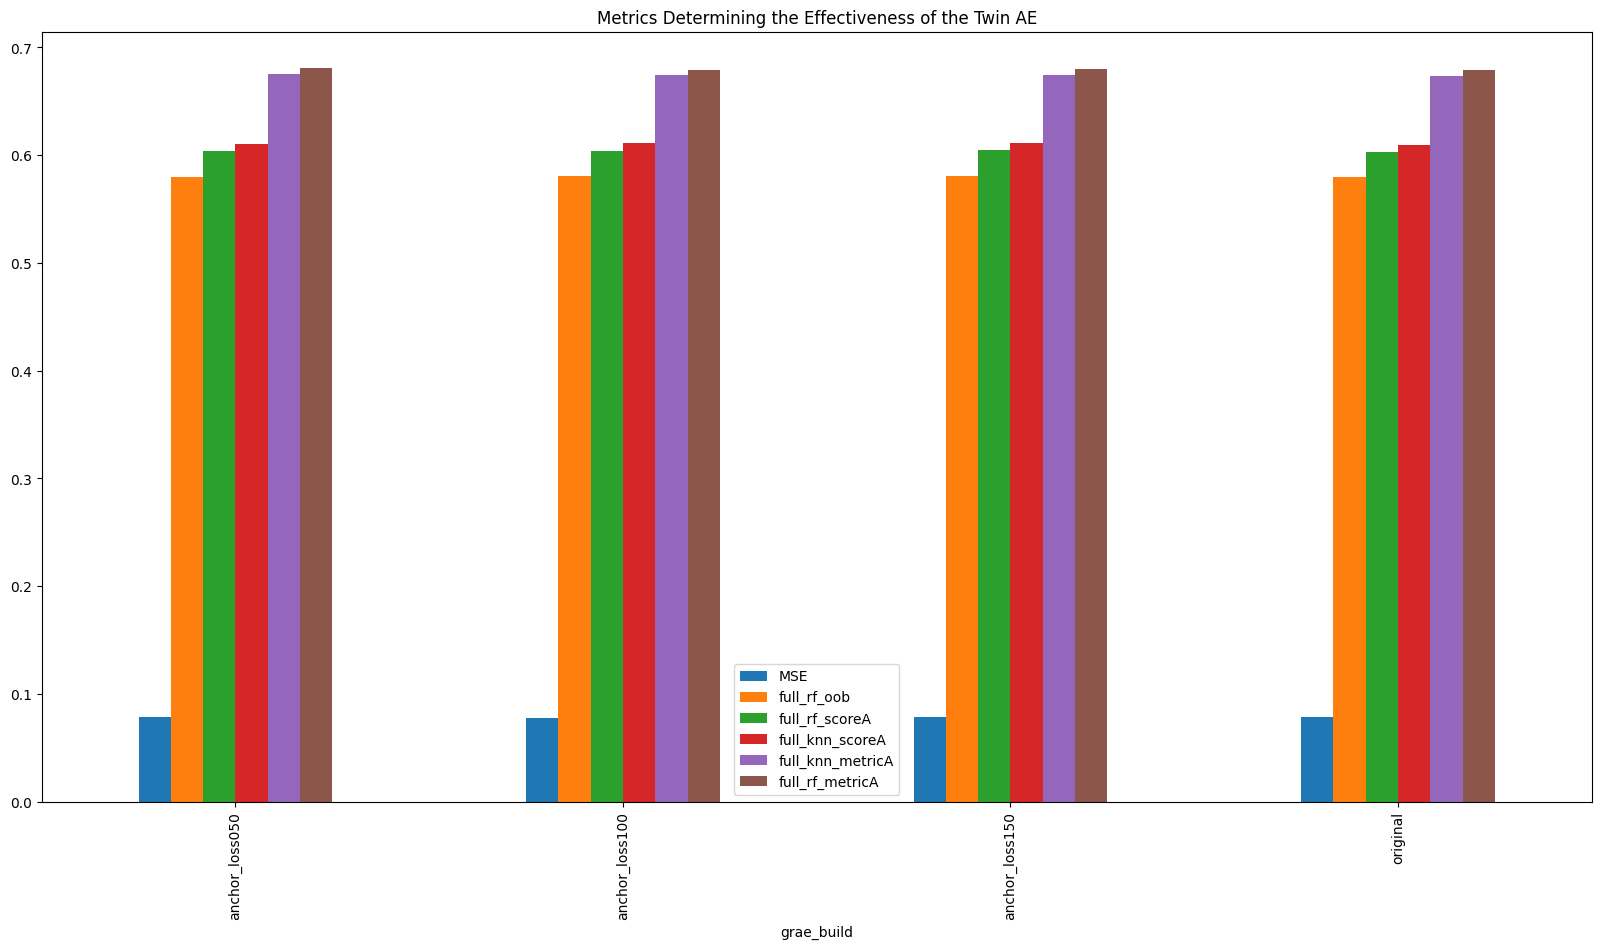

In [48]:
Col = grae_results.columns[4:][[0,1, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Metrics Determining the Effectiveness of the Twin AE", figsize=(20,10))

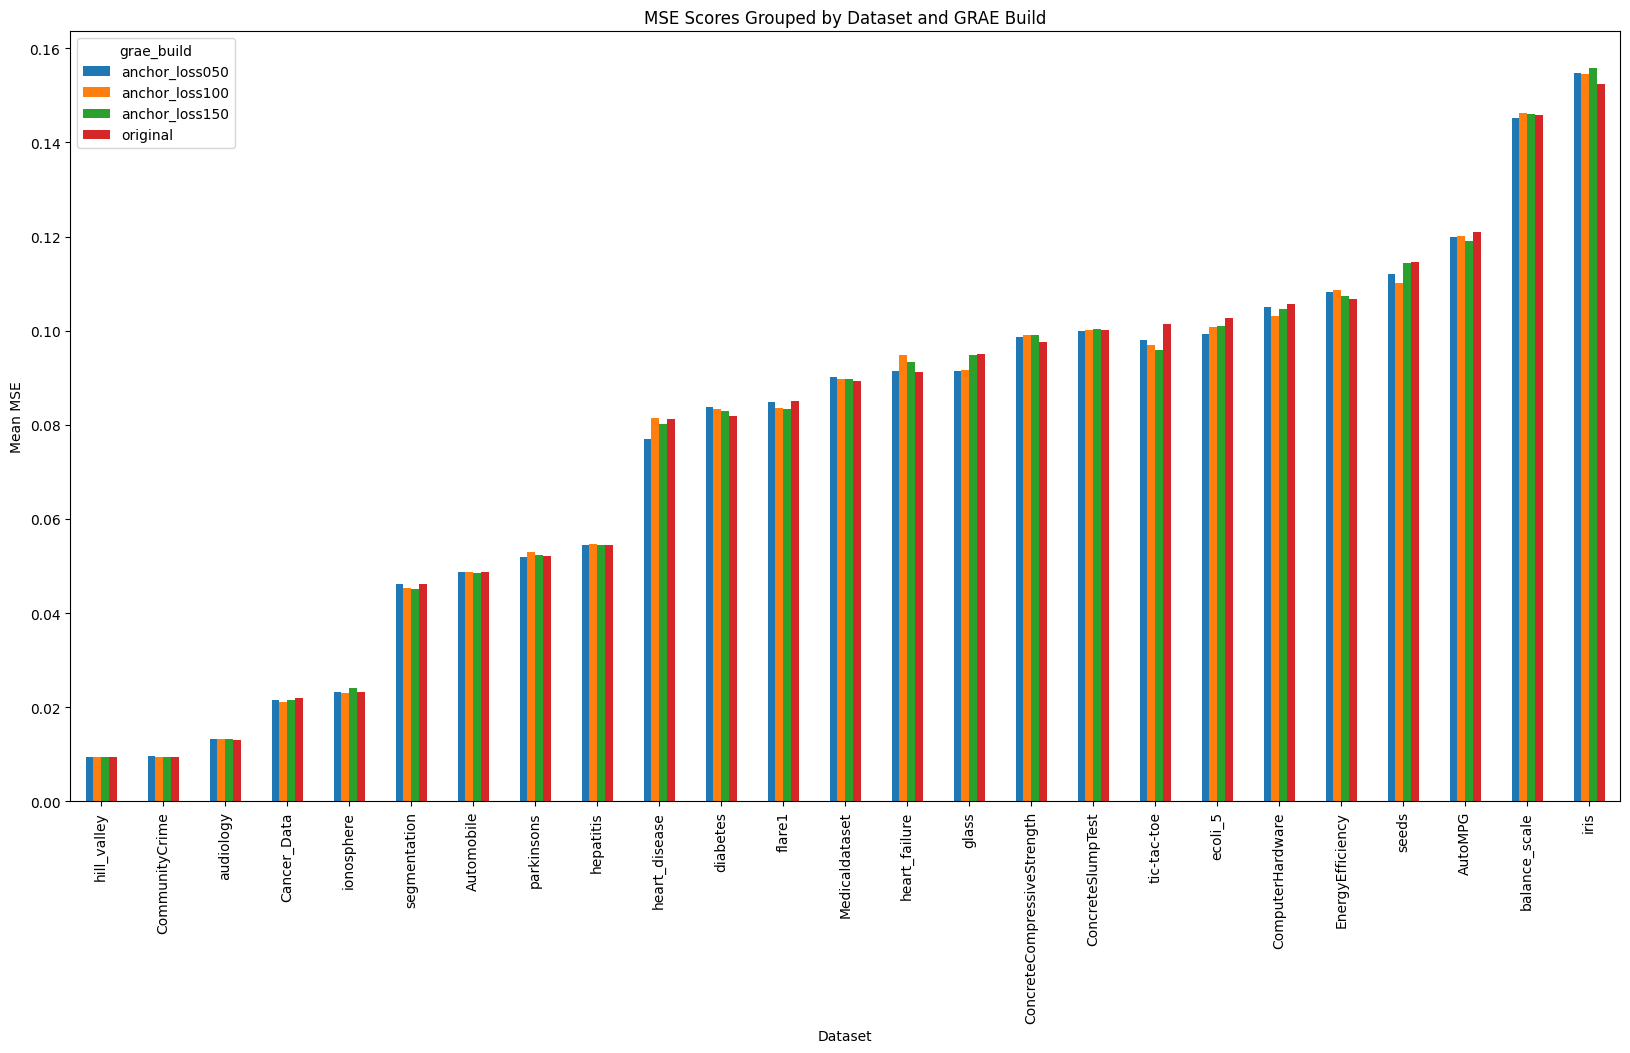

In [13]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

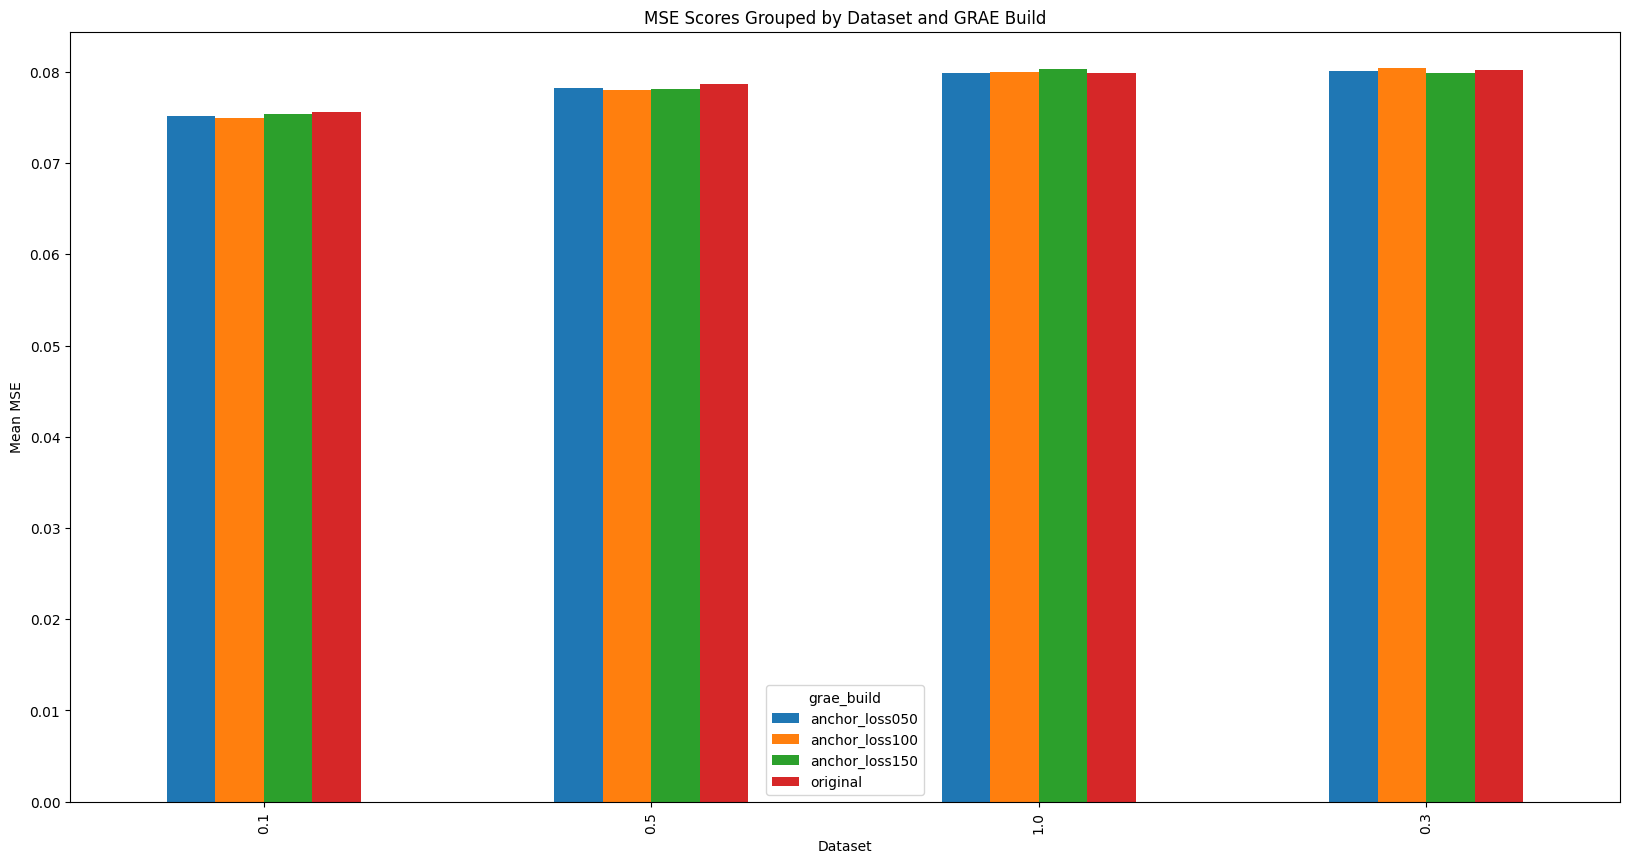

In [14]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['Anchor_Percent', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

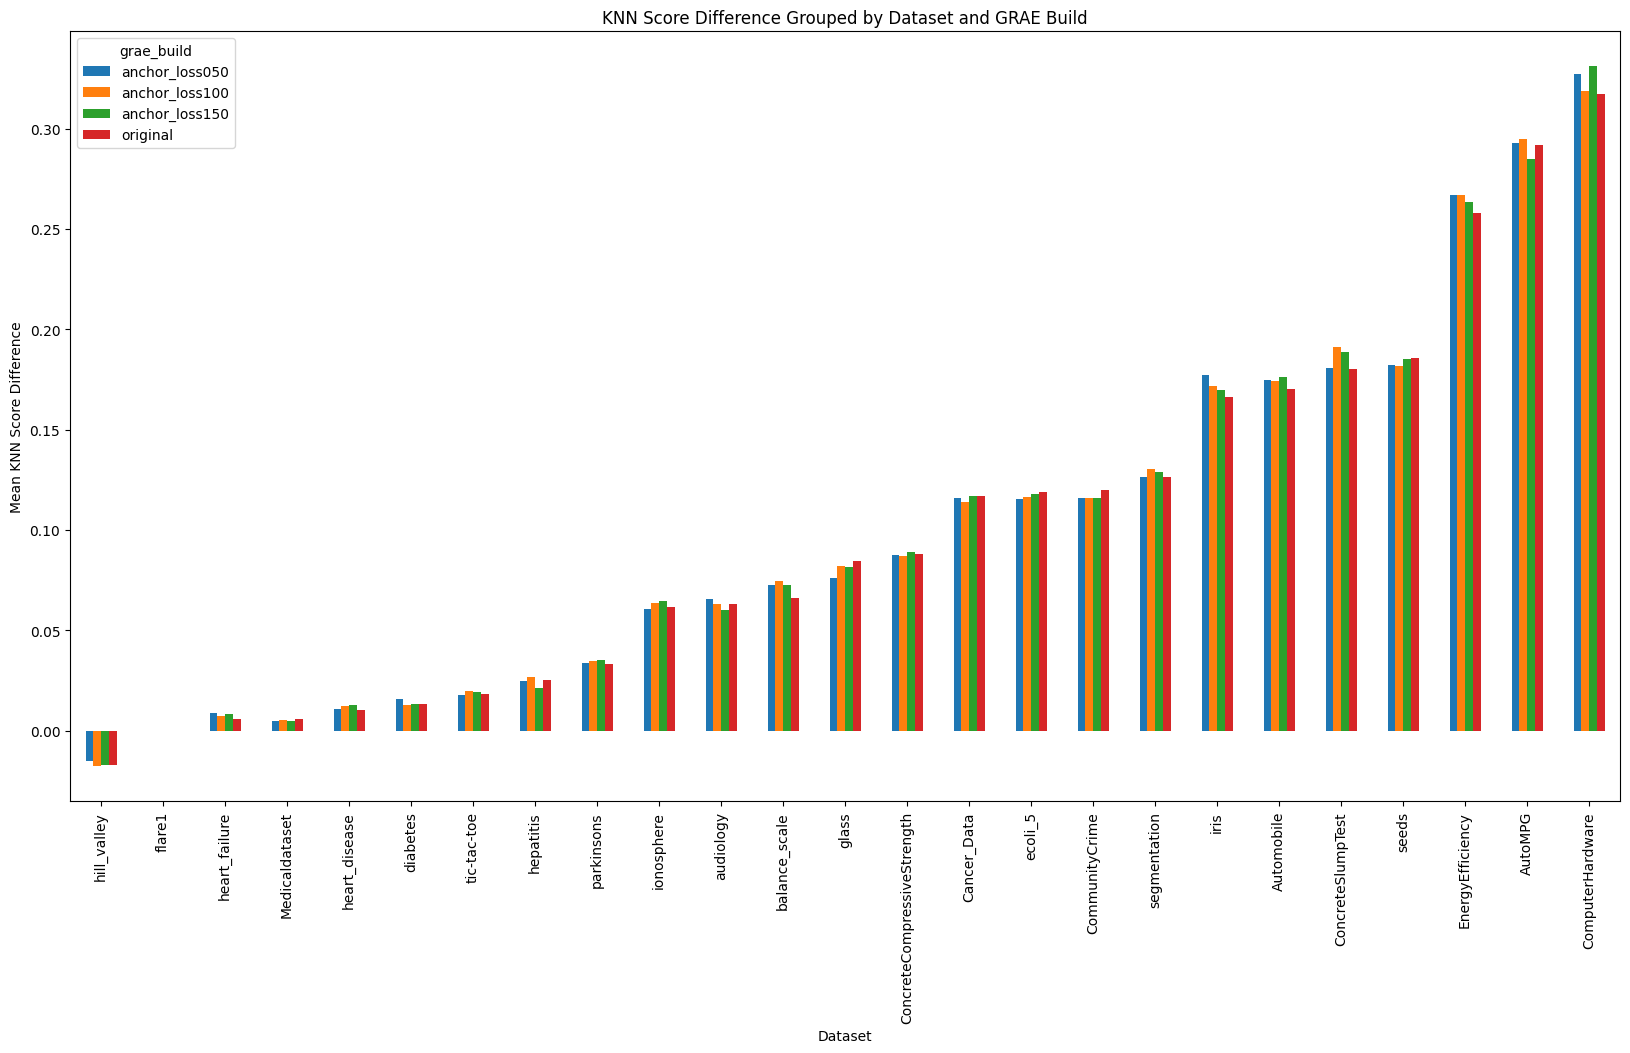

In [15]:
import matplotlib.pyplot as plt

# Calculate the difference between full_knn_scoreA and pred_knn_scoreA
grae_results['knn_score_diff'] = grae_results['full_knn_scoreA'] - grae_results['pred_knn_scoreA']

# Group by dataset and grae_build, then calculate the mean of the difference
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['knn_score_diff'].mean().unstack()

# Sort the DataFrame by the mean difference of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='KNN Score Difference Grouped by Dataset and GRAE Build')
plt.ylabel('Mean KNN Score Difference')
plt.xlabel('Dataset')
plt.show()

## Alternate Methodologies
- MSE here represents how far the data translated to the other domain is off

In [16]:
alternate.sample(5)

,method,dataset,split,MSE,Anchor_Percent
2256,MASH,CommunityCrime,distort,1217.894519,0.5
2042,MAGAN,ionosphere,turn,0.102426,0.1
559,MASH,parkinsons,random,21.240733,0.1
1692,MASH,CommunityCrime,even,236.619743,1.0
757,DTA,glass,distort,0.546754,0.1


              MSE
method           
DTA      4.805846
MAGAN    0.129178
MASH    24.686687


<Axes: title={'center': 'MSE for Alternate GRAE'}, xlabel='method'>

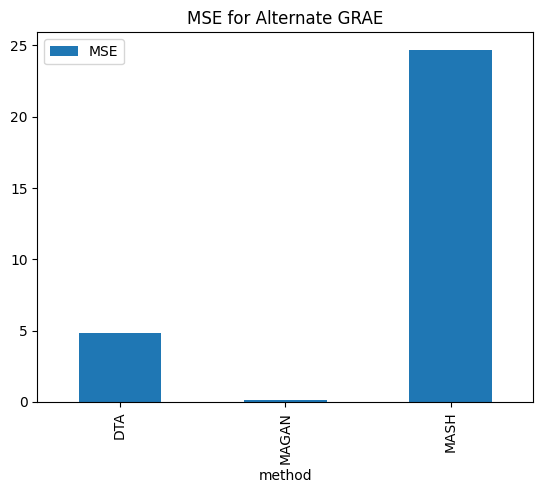

In [17]:
print(alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean())
alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean().plot(kind="bar", title="MSE for Alternate GRAE")

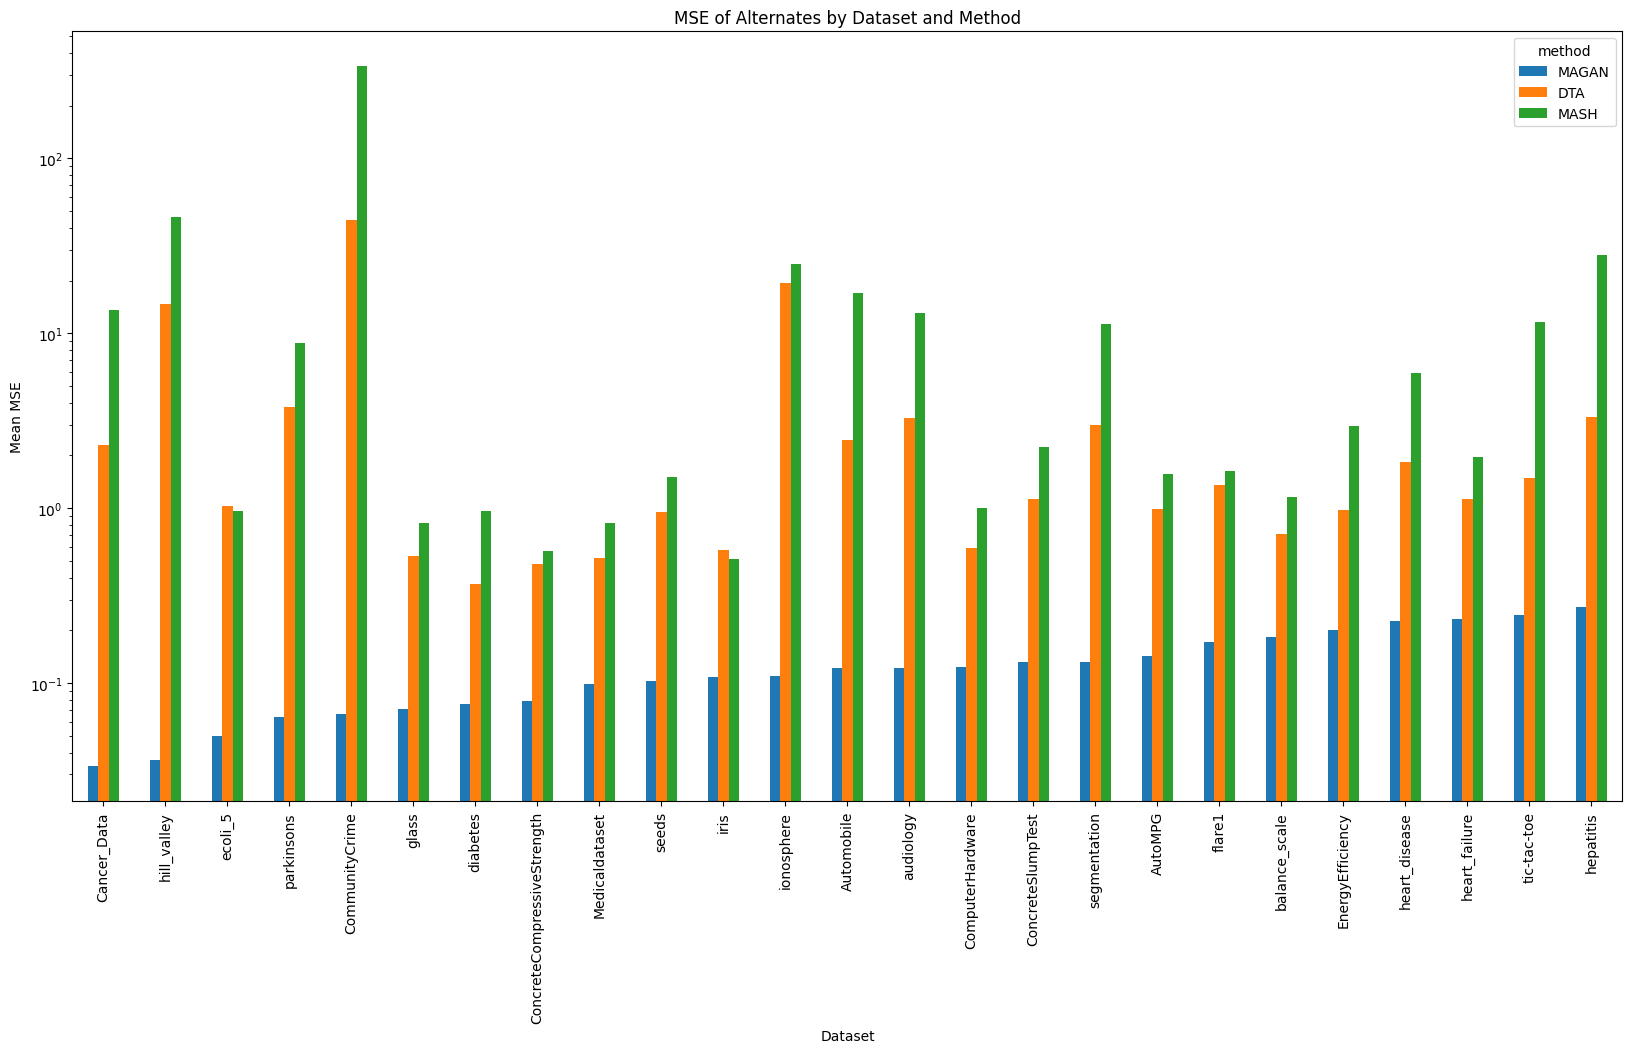

In [18]:
import matplotlib.pyplot as plt

# Group by dataset and method, then calculate the mean MSE
grouped_alternate = alternate.groupby(['dataset', 'method'])['MSE'].mean().unstack()

grouped_alternate = grouped_alternate.sort_values(by='MAGAN')

#Swap magan and dta column
grouped_alternate = grouped_alternate[["MAGAN", 'DTA', 'MASH']]

# Plot the results
grouped_alternate.plot(kind='bar',  logy=True, figsize=(20, 10), title='MSE of Alternates by Dataset and Method')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

In [19]:
grouped_alternate

method,MAGAN,DTA,MASH
dataset,,,
Cancer_Data,0.033284,2.302769,13.663921
hill_valley,0.036313,14.652032,46.343769
ecoli_5,0.049965,1.027604,0.960371
parkinsons,0.063543,3.789989,8.750276
CommunityCrime,0.066189,44.530029,335.473084
glass,0.071234,0.529622,0.816978
diabetes,0.075699,0.367267,0.966647
ConcreteCompressiveStrength,0.078910,0.480484,0.565969
Medicaldataset,0.098936,0.516848,0.825991


## GRAE MSE to Truth
- MSE error from GRAE translation (A to B) compared to actual B

In [4]:
len(MSE_to_Data)

8132

In [7]:
len(MSE_to_Data[MSE_to_Data["lam"] != 100])

0

In [5]:
MSE_to_Data.sample(5)

,method,dataset,split,lam,MSE,Anchor_Percent
3857,DTA,Medicaldataset,even,100,0.101418,0.1
36389,JLMA,ConcreteSlumpTest,turn,100,0.062551,0.5
12550,MASH-,glass,random,100,0.020301,1.0
42367,MASH-,glass,even,100,0.029764,0.5
7723,JLMA,EnergyEfficiency,distort,100,0.014460,0.1


<Axes: title={'center': "GRAE's ability to recreate data"}, xlabel='method'>

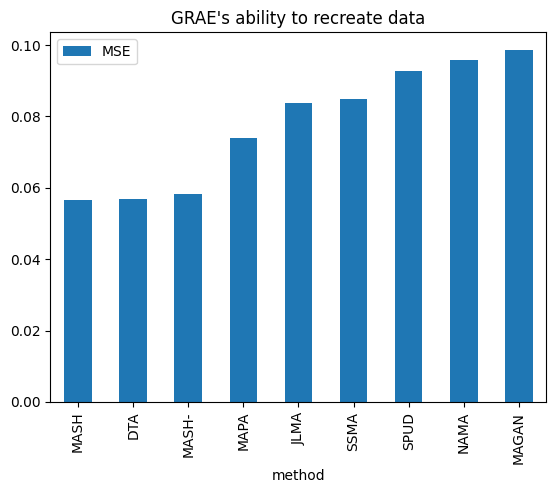

In [6]:
#Plot by Method
MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent"]).groupby("method").mean().sort_values(by = "MSE").plot(kind="bar", title="GRAE's ability to recreate data")

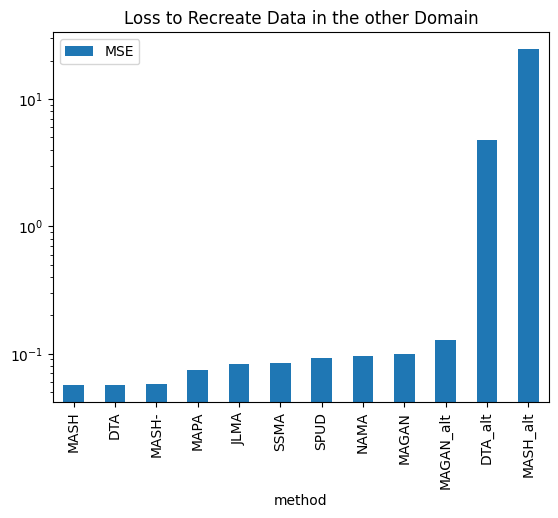

In [7]:
alt_methods = alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean()
alt_methods.index = alt_methods.index + "_alt"

grae_methods = MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent"]).groupby("method").mean()

methods = pd.concat([alt_methods, grae_methods]).sort_values(by = "MSE").plot(kind="bar", logy = True, title="Loss to Recreate Data in the other Domain")

In [8]:
alt_methods

,MSE
method,
DTA_alt,4.805846
MAGAN_alt,0.129178
MASH_alt,24.686687


In [10]:
MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent"]).groupby("method").mean().sort_values(by = "MSE")

,MSE
method,
MASH,0.056684
DTA,0.056848
MASH-,0.058280
MAPA,0.073887
JLMA,0.083689
SSMA,0.084780
SPUD,0.092728
NAMA,0.095918
MAGAN,0.098673


# Testing Pipelines

## First pipeline

In [20]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_parrelization(extract_all_files())
tasks[0:3]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.1,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.5,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  42)]

In [21]:
task_iris = next(task for task in tasks if task[4] == 0.1)
task_iris

('SPUD',
 'ComputerHardware',
 'random',
 {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
 0.1,
 'anchor_loss050',
 42)

In [22]:
GRAE_tests(*tasks[15])

Results already exist for SPUD, ComputerHardware, random.


False

In [23]:
#Get the embeddings
emb_pred, emb_full, labels = get_embeddings(*task_iris)

# Calculate MSE between embeddings
train_len = len(labels[0])
test_len = train_len + len(labels[1])
mse_emb_pred = np.vstack([emb_pred[train_len:test_len], emb_pred[test_len + train_len:]])
mse_emb_full = np.vstack([emb_full[train_len:test_len], emb_full[test_len + train_len:]])
mse = mean_squared_error(mse_emb_pred, mse_emb_full)

## Second Pipeline

In [24]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_DTA_MAGAN_MASH(extract_all_files())
tasks[0:3]

[('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  0.1,
  'alternate',
  42),
 ('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  0.5,
  'alternate',
  42),
 ('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  1,
  'alternate',
  42)]

In [25]:
task_dta = next(task for task in tasks if task[0] == "MAGAN")
task_dta

('MAGAN',
 'ComputerHardware',
 'skewed',
 {'learning_rate': 0.005},
 0.1,
 'alternate',
 42)

In [26]:
GRAE_tests(*task_dta)

Results already exist for MAGAN, ComputerHardware, skewed.


False

## Third Pipeline

In [8]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_MSE(extract_all_files())
tasks[0:3]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.1,
  'just_MSE',
  42,
  0),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.5,
  'just_MSE',
  42,
  0),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'just_MSE',
  42,
  0)]

In [1]:
tasks = ('SPUD',
 'ComputerHardware',
 'distort',
 {'knn': 32, 'OD_method': 'mean', 'agg_method': 'log'},
 1,
 'just_MSE',
 42,
 50)

In [2]:
from Helpers.grae_pipeline_helpers import *

GRAE_tests(*tasks)

2025-03-04 09:45:31.077801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 09:45:31.120532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 09:45:31.133429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 09:45:31.160189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-04 09:45:33.365942: W tensorflow/comp

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/SPUD_ComputerHardware_distort_graeBuild_just_MSE_lam_50_seed42_an1.json


True